# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
# 1.
y, X = patsy.dmatrices("tip ~ sex + smoker + day + time + net_bill", data=tips, return_type='dataframe')

modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     17.19
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           2.49e-18
Time:                        23:13:11   Log-Likelihood:                -374.68
No. Observations:                 244   AIC:                             765.4
Df Residuals:                     236   BIC:                             793.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.2006      0.259      4.

In [4]:
# 2.
modelo_ref = smf.ols("tip ~ net_bill", data=tips).fit()
print(modelo_ref.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           5.02e-23
Time:                        23:13:11   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

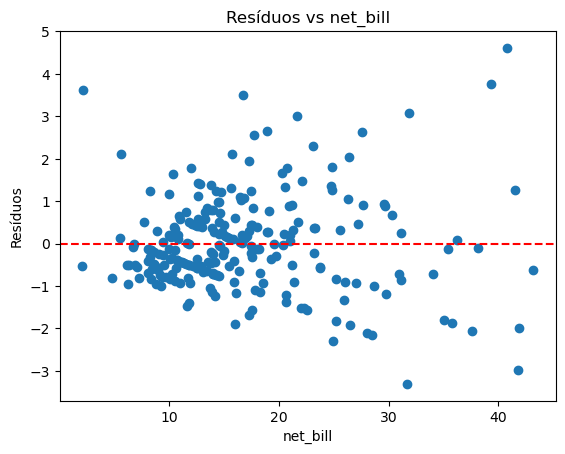

In [5]:
# 3.
residuos = modelo_ref.resid
plt.scatter(tips['net_bill'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill")
plt.show()

In [6]:
# 4.
modelo_log = smf.ols("tip ~ np.log(net_bill)", data=tips).fit()
print(modelo_log.summary())

modelo_poly = smf.ols("tip ~ net_bill + I(net_bill**2)", data=tips).fit()
print(modelo_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           4.40e-20
Time:                        23:13:11   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

--> O modelo com logaritmo parece ser melhor por possuir um p value próximo de zero.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [7]:
# 1.
y, X = patsy.dmatrices("np.log(tip) ~ sex + smoker + day + time + net_bill", data=tips, return_type='dataframe')

modelo_2 = sm.OLS(y, X).fit()
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     16.01
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           3.58e-17
Time:                        23:13:11   Log-Likelihood:                -95.865
No. Observations:                 244   AIC:                             207.7
Df Residuals:                     236   BIC:                             235.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4551      0.083      5.

In [8]:
# 2.
modelo_ref_2 = smf.ols("np.log(tip) ~ net_bill", data=tips).fit()
print(modelo_ref_2.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           2.60e-21
Time:                        23:13:11   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

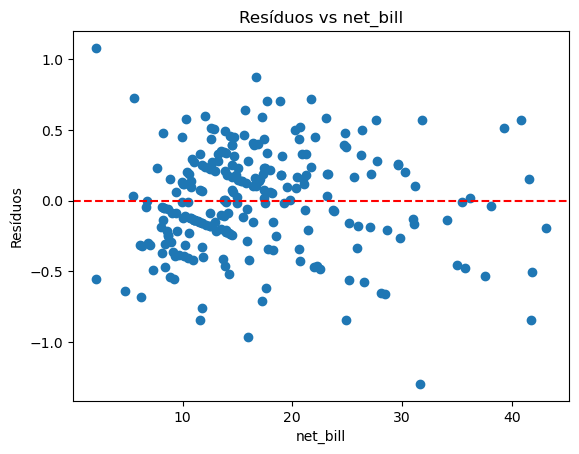

In [9]:
# 3.
residuos = modelo_ref_2.resid
plt.scatter(tips['net_bill'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("net_bill")
plt.ylabel("Resíduos")
plt.title("Resíduos vs net_bill")
plt.show()

In [10]:
# 4.
modelo_log = smf.ols("tip ~ np.log(net_bill)", data=tips).fit()
print(modelo_log.summary())

modelo_poly = smf.ols("tip ~ net_bill + I(net_bill**2)", data=tips).fit()
print(modelo_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           4.40e-20
Time:                        23:13:11   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

In [11]:
# 5.
y_pred_log = modelo_log.predict(X)

tip_pred = np.exp(y_pred_log)

r2_original_scale = r2_score(tips['tip'], tip_pred)
print("R² na escala de tip:", r2_original_scale)

R² na escala de tip: -479.90426879517565


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [12]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [13]:
# 1.
y, X = patsy.dmatrices("renda ~ tempo_emprego", data=df, return_type='dataframe')

modelo = sm.OLS(y, X).fit()
print(modelo_ref_2.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           2.60e-21
Time:                        23:13:11   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

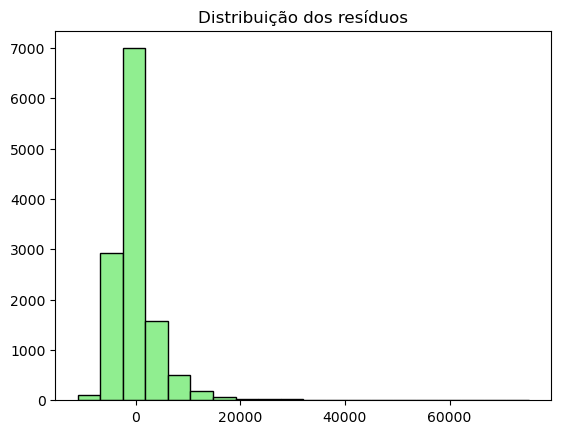

In [14]:
# 2.
residuos = modelo.resid
plt.hist(residuos, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição dos resíduos')
plt.show()

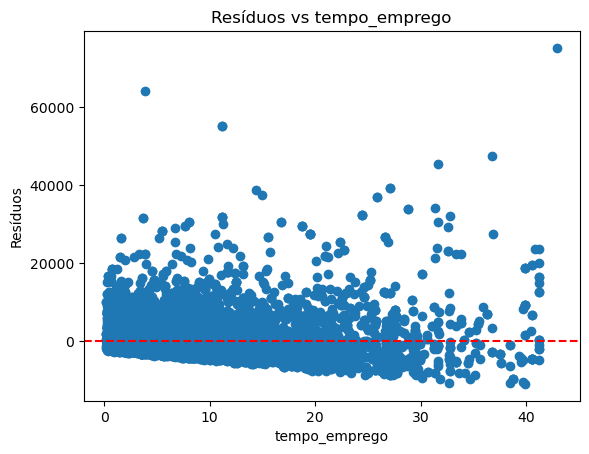

In [15]:
plt.scatter(X['tempo_emprego'], residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("tempo_emprego")
plt.ylabel("Resíduos")
plt.title("Resíduos vs tempo_emprego")
plt.show()

In [20]:
# 3.
formula = "np.log(renda) ~ tempo_emprego + idade + qtd_filhos + qt_pessoas_residencia + sexo + posse_de_veiculo + posse_de_imovel + tipo_renda + educacao + estado_civil + tipo_residencia"

y, X = patsy.dmatrices(formula, data=df, return_type="dataframe")

modelo_2 = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:13:30   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

In [24]:
# 4.
y, X = patsy.dmatrices("np.log(renda) ~ sexo + tipo_renda + tipo_residencia + tempo_emprego + idade", data=df, return_type="dataframe")

modelo_3 = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Thu, 21 Aug 2025   Prob (F-statistic):               0.00
Time:                        23:14:12   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

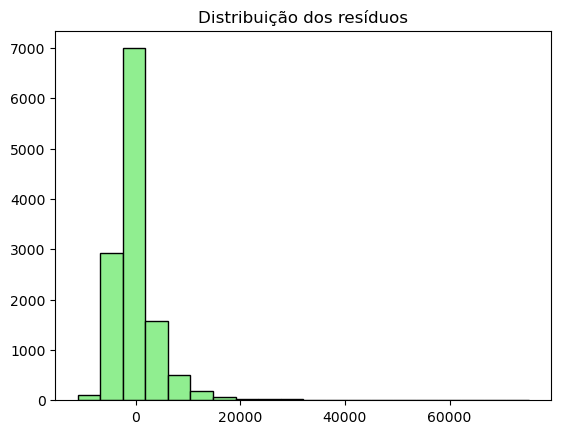

In [27]:
# 5.
residuos_2 = modelo_3.resid
plt.hist(residuos, bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribuição dos resíduos')
plt.show()

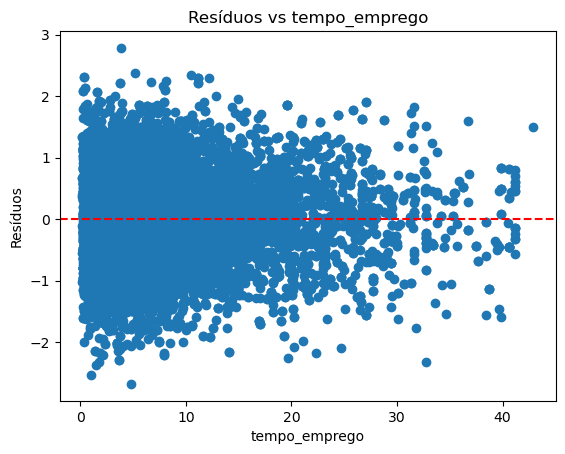

In [26]:
plt.scatter(X['tempo_emprego'], residuos_2)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("tempo_emprego")
plt.ylabel("Resíduos")
plt.title("Resíduos vs tempo_emprego")
plt.show()